# Uso de PCA (Principal Components Analysis)
Por Rodolfo Antonio Zea Posadas

En este notebook vamos a implementar PCA, para **reducir la dimensionalidad** de los distintos features obtenidos a partir de de las imágenes de perros obtenidas del dataset. Una vez se ha aplicado reducción de dimensionalidad, se aplica clustering para clasificar la información obtenida a partir del dataset.

Dataset: [Dog Breed Identification](https://www.kaggle.com/c/dog-breed-identification/data)

In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from random import sample
import pandas as pd
import imageio as imio

#### Pre-procesamiento

El pre-procesamiento ya fue realizado y el dataset preparado y esta listo para usarse, para esto se aplicó un proceso conocido como "transfer learning" usando la red neuronal "Inception" de Google. 

Estas features/características fueron almacenadas en un matriz de numpy.

### Referencias opcionales para transfer learning y "Google inception"
##### Inception
https://www.tensorflow.org/tutorials/image_recognition

https://research.googleblog.com/2016/03/train-your-own-image-classifier-with.html

##### Transfer Learning
https://www.datacamp.com/community/tutorials/transfer-learning

In [3]:
images_inception_features = './pre-processing/training_inception_features_array.npy'
training_image_labels_array = './pre-processing/training_image_labels_array.npy'
training_image_names_array = './pre-processing/training_image_names_array.npy'

In [4]:
TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array, allow_pickle=True)
training_set_dict['label'] = np.load(training_image_labels_array, allow_pickle=True)
training_set_dict['features'] = np.load(images_inception_features, allow_pickle=True)

# PCA
La data la vamos a manejar en los siguientes 3 arreglos: 

- features    : features de la imagen dadas por google Inception
- labels      : label de la imagen, identifica que raza es
- images_name : nombre de la imgen original, si descargan el dataset con link en la descripcion pueden buscar la imagen original por este nombre.

In [5]:
# Cargamos las features y las labes de cada feature
features = training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

In [6]:
# Mostramos la forma que tiene nuestro array de features
features.shape

(10222, 2048)

Aplicamos PCA a nuestras features utilizando scikitlearn. Reduciremos la dimensionalidad del dataset de features a 2 dimensiones.

In [7]:
# Reducimos la dimensionalidad del dataset a 2 dimensiones.
pca = PCA(n_components = 2)
features_reducidas = pca.fit_transform(features)

Vemos que se ha aplicado reducción de dimensionalidad utilizando PCA para reducir de 2048 features a únicamente 2.

In [8]:
features_reducidas.shape

(10222, 2)

Graficamos nuestras features ya reducidas a 2 dimensiones.

Text(0, 0.5, 'feature 2')

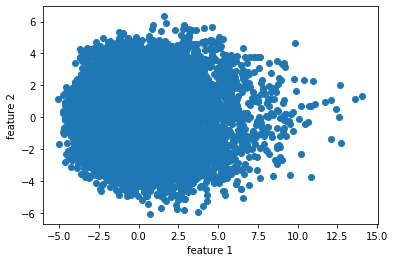

In [9]:
plt.scatter(features_reducidas[:, 0], features_reducidas[:, 1])
plt.xlabel('feature 1')
plt.ylabel('feature 2')

# Clustering utilizando K-means

Utilizaremos sklearn para aplicar K-means a nuestro dataset de 2 dimensiones para clasificar las distintas razas obtenidas de nuestro dataset de features inicial. 

Almacenaremos en la variable breeds las distintas razas de perros existentes en el dataset de features.

In [35]:
breeds = np.unique(labels)

Aplicamos el método del codo para calcular el número de clusters a utilizar.

In [33]:
sum_squared_distances = []
k = range (5, 80)
for n in k:
    km = KMeans(n_clusters = n)
    km = km.fit(features_reducidas)
    sum_squared_distances.append(km.inertia_)

Procedemos a graficar la curba del método del codo por los valores de k (número de clusters).

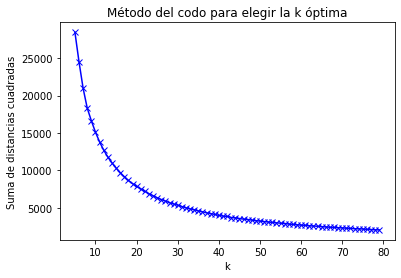

In [34]:
plt.plot(k, sum_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Suma de distancias cuadradas')
plt.title('Método del codo para elegir la k óptima')
plt.show()

Con base a la gráfica del codo anterior se elige 17 como el valor de k (número de clusters).

In [36]:
n_clusters = 17
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(features_reducidas)
kmeans.labels_

array([14, 13, 11, ..., 13, 11,  2])

In [37]:
clusters = KMeans.fit_predict(kmeans, features_reducidas, y=None, sample_weight=None)
kmeans.cluster_centers_.shape

(17, 2)

Es posible apreciar que KMeans ha identificado 17 puntos (cada uno de 2 coordenadas, es decir, 2 dimensiones) obtenidas a partir del dataset de features reducidas y del número de clusters seleccionado. Procedemos a gráficar nuevamente el dataset junto con los centros de los clusters para ver los 17 distintos clusters.

In [38]:
centers = kmeans.cluster_centers_
centers

array([[ 0.8171553 ,  1.7477899 ],
       [-1.3557636 , -0.8193509 ],
       [ 5.079644  , -1.8640721 ],
       [ 0.4893055 , -2.1307597 ],
       [-2.605056  ,  2.1710274 ],
       [ 3.024278  ,  0.8677811 ],
       [-1.128792  , -2.9293363 ],
       [ 8.681818  ,  0.19590235],
       [-2.8462749 , -1.9636877 ],
       [-0.7626047 ,  3.2049375 ],
       [ 2.2371242 , -3.5646648 ],
       [ 5.207885  ,  2.338223  ],
       [ 0.4181944 , -0.18374832],
       [ 2.5097106 , -1.3418252 ],
       [-1.2020615 ,  1.1654638 ],
       [ 2.0162365 ,  3.5777488 ],
       [-3.1610904 ,  0.18447329]], dtype=float32)

Graficamos los clusters y los centros obtenidos.

Text(0, 0.5, 'feature 2')

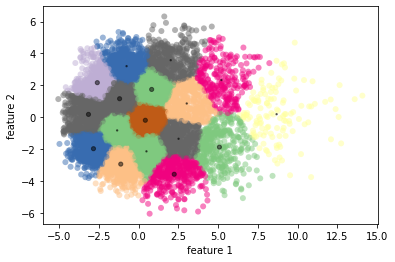

In [39]:
plt.scatter(features_reducidas[:, 0], features_reducidas[:, 1],
            c=kmeans.labels_, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=centers.shape, alpha=0.5);

plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [40]:
df = pd.DataFrame({'cluster':kmeans.labels_, 'breed':labels})
df

,cluster,breed
0,14,boston_bull
1,13,dingo
2,11,pekinese
3,6,bluetick
4,10,golden_retriever
5,1,bedlington_terrier
6,12,bedlington_terrier
7,8,borzoi
8,15,basenji
9,13,scottish_deerhound


Ordenamos nuestro dataframe por el número de cluster, seguido de la raza de forma ascendente.

In [41]:
df_sorted = df.sort_values(by=['cluster', 'breed'])
df_sorted

,cluster,breed
3479,0,affenpinscher
4374,0,affenpinscher
5769,0,affenpinscher
9709,0,affenpinscher
15,0,african_hunting_dog
5795,0,african_hunting_dog
5904,0,african_hunting_dog
1263,0,airedale
3615,0,airedale
9226,0,airedale


# Conclusión 


Es posible observar, en la tabla final que tanto el cluster 0, como el cluster 16 agrupan una gran cantidad de perros de variedad "terrier". Sin embargo, al ser más de 10k registros, es imposible concluir si los clusters obtenidos se relacionan, de alguna forma, con las distintas razas de los perros.

Esto requeriría de un análisis más exhaustivo, en donde se debería adicionalmente comparar las imágenes de los perros pertenecientes a los distintos clusters, para intentar explicar más o menos el criterio utilizado.